In [1]:
%%capture capt
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")


Version:  2.15.0
Eager mode:  True
GPU is NOT AVAILABLE


In [3]:
from TSNE_code.TSNE_utils import TSNE
from sklearn.manifold import TSNE as sk_TSNE

# Load trained model

In [4]:
model = tf.keras.models.load_model('model.h5')

In [5]:
embedding = model.layers[0].get_weights()[0]
print(f"Embedding shape: {embedding.shape}")

Embedding shape: (5000, 256)


# Scikit-learn t-SNE

In [6]:
tsne = sk_TSNE(n_components=2, n_jobs=-1)
embedded_data = tsne.fit_transform(embedding)

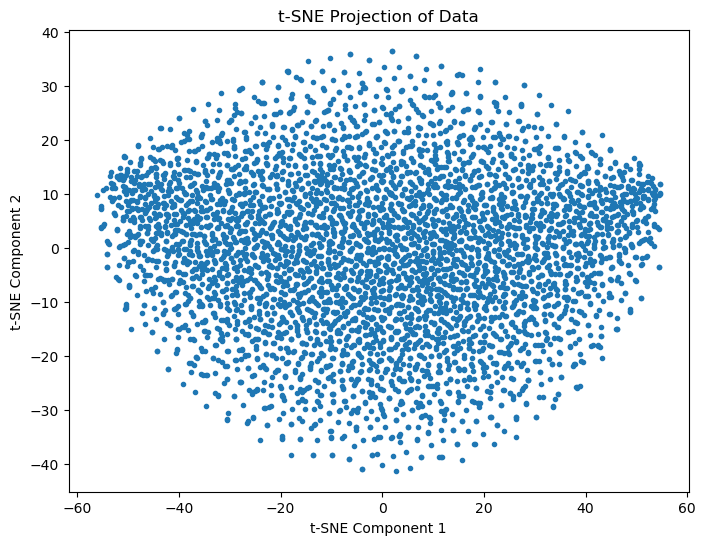

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], marker='.')
plt.title('t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Custom t-SNE

### With Delta-bar-delta adaptive learning rate

In [8]:
from TSNE_code.TSNE_utils import TSNE, _compute_gradient, _compute_squared_distances
from TSNE_code.joint_probabilities import compute_joint_probabilities

In [9]:
t = TSNE(n_components=2, perplexity=30)

In [10]:
low_dim_embedding = t.fit_transform(embedding, verbose=2)

Computing binary search for conditional probabilities...


100%|██████████| 5000/5000 [00:07<00:00, 648.01it/s]


Starting gradient descent loop...


 75%|███████▌  | 750/1000 [06:47<02:15,  1.84it/s]

Algorithm has converged at step 750


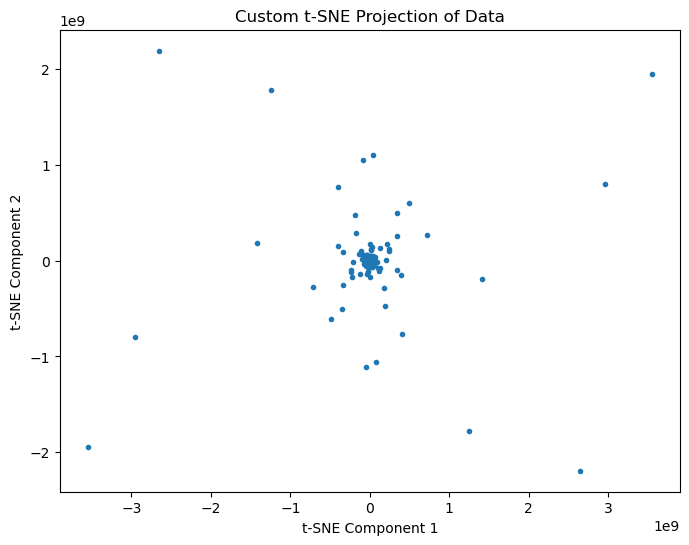

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_embedding[:, 0], low_dim_embedding[:, 1], marker='.')
plt.title('Custom t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Without Delta-bar-delta adaptive learning rate

In [12]:
t_no_adpt = TSNE(n_components=2, perplexity=30, adaptive_learning_rate=False)

In [13]:
low_dim_embedding_no_adpt = t_no_adpt.fit_transform(embedding, verbose=2)

Computing binary search for conditional probabilities...


100%|██████████| 5000/5000 [00:06<00:00, 749.15it/s]


Starting gradient descent loop...


100%|██████████| 1000/1000 [09:20<00:00,  1.78it/s]


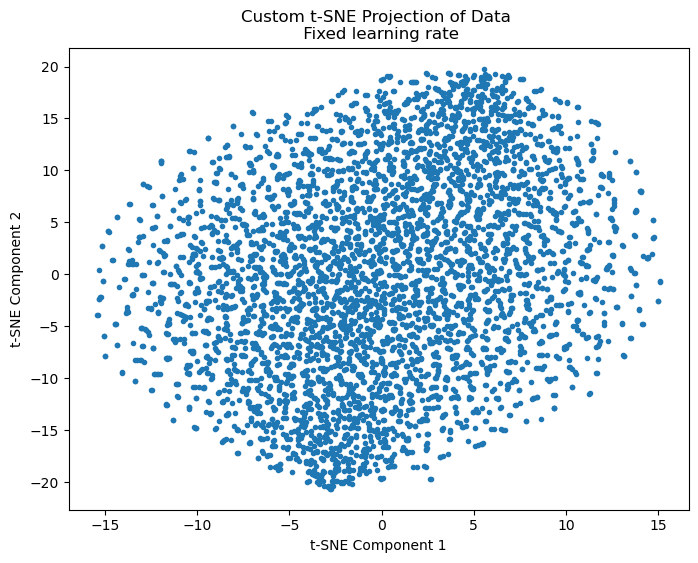

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_embedding_no_adpt[:, 0], low_dim_embedding_no_adpt[:, 1], marker='.')
plt.title('Custom t-SNE Projection of Data \n Fixed learning rate')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()